In [1]:
#Librerías que utilicé 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 
import scipy.stats as stats
import seaborn as sns
from scipy.stats import t

In [24]:
#Aquí importo el dataset llamado "data"
data = pd.read_csv('data.csv',index_col = False)

#Verifico que mis datos se hayan cargado correctamente
data.head()

,participant,age:1,gender:1,salidas:1,noviazgo:1,origen:1,calificacion_mejor:1,calificacion_peor:1,antecedente_psiq:1,ndc:1,...,ndc:14,ndc:15,ndc:16,ndc:17,ndc:18,igt:1,country,TIME_start,TIME_end,TIME_total
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,18,1,2,1,2,10.0,0,2,5,...,5,5,2,2,5,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,"MX, Mexico",2020-01-15-17-29,2020-01-15-17-37,8.0
1,s.65fc217a-f4de-459f-9acb-272237a94e73.txt,20 años,1,3,2,2,82.0,5.95,1,4,...,4,4,3,2,2,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN
2,s.0742574d-2230-48f0-b795-42e1fd5d0839.txt,18,1,3,2,2,NaN,No he tenido,2,3,...,4,2,5,2,5,NaN,"MX, Mexico",2020-01-15-17-30,NaN,NaN
3,s.26328d2c-466f-467e-9860-b27601337486.txt,5,2,2,2,2,67.0,NaN,1,1,...,2,5,3,4,3,NaN,"MX, Mexico",2020-01-15-17-49,NaN,NaN
4,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,18 años,2,3,2,2,9.4,7,2,3,...,3,3,5,1,4,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,"MX, Mexico",2020-01-15-17-30,2020-01-15-17-40,10.0


In [25]:
#Para mejorar la eficiencia del código, me voy a deshacer de todas las columnas que no voy a necesitar
data = data[['participant','salidas:1','igt:1']]
#Verifico la información con la que me quedé 
data.head()

,participant,salidas:1,igt:1
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,2,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...
1,s.65fc217a-f4de-459f-9acb-272237a94e73.txt,3,NaN
2,s.0742574d-2230-48f0-b795-42e1fd5d0839.txt,3,NaN
3,s.26328d2c-466f-467e-9860-b27601337486.txt,2,NaN
4,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,3,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...


Las ganancias finales están obviamente relacionadas con el juego de los botones, por tanto, voy a eliminar a todos los alumnos que no hayan jugado

In [27]:
#Elimino las entradas de todos los alumnos que no jugaron
data = data.dropna()
#muestro una parte de los datos con los que sí puedo trabajar
data.head()

,participant,salidas:1,igt:1
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,2,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...
4,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,3,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...
5,s.71755364-47a2-475b-affb-fda6465de62e.txt,3,igt.2020-01-15-1757.data.71755364-47a2-475b-af...
7,s.cac0f1e9-2b83-49a2-b44d-9eec69bea2df.txt,2,igt.2020-01-15-1740.data.cac0f1e9-2b83-49a2-b4...
9,s.9adf1fae-ab88-4f55-ae2d-2052062f60d8.txt,2,igt.2020-01-15-1755.data.9adf1fae-ab88-4f55-ae...


Ahora voy a calcular el dinero que ganaron cada uno de los alumnos. 


***El dinero que ganaron está calculado por la diferencia entre la última vez que presionaron el botón para jugar menos 2,000 porque fue con lo que empezaron a jugar***

In [30]:
#Creo una nueva columna para guardar el dinero que ganaron en el juego
data['Dinero ganado'] = 0
#muestro mi data con la nueva columna
data.head()

,participant,salidas:1,igt:1,Dinero ganado
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,2,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,0
4,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,3,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,0
5,s.71755364-47a2-475b-affb-fda6465de62e.txt,3,igt.2020-01-15-1757.data.71755364-47a2-475b-af...,0
7,s.cac0f1e9-2b83-49a2-b44d-9eec69bea2df.txt,2,igt.2020-01-15-1740.data.cac0f1e9-2b83-49a2-b4...,0
9,s.9adf1fae-ab88-4f55-ae2d-2052062f60d8.txt,2,igt.2020-01-15-1755.data.9adf1fae-ab88-4f55-ae...,0


In [32]:
#Relleno las tablas con la información necesaria
for index,row in data.iterrows():
    x = data['igt:1'][index]
    juego = pd.read_csv(x,sep=' ',header=None)
    dinero = juego[4][int(len(juego)-1)] - juego[3][0]
    data['Dinero ganado'][index] = dinero

In [35]:
#Verifico que se haya cargado bien la información
data.head()

,participant,salidas:1,igt:1,Dinero ganado
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,2,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,350
4,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,3,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,-350
5,s.71755364-47a2-475b-affb-fda6465de62e.txt,3,igt.2020-01-15-1757.data.71755364-47a2-475b-af...,1650
7,s.cac0f1e9-2b83-49a2-b44d-9eec69bea2df.txt,2,igt.2020-01-15-1740.data.cac0f1e9-2b83-49a2-b4...,-400
9,s.9adf1fae-ab88-4f55-ae2d-2052062f60d8.txt,2,igt.2020-01-15-1755.data.9adf1fae-ab88-4f55-ae...,-800


In [40]:
#Veo cuales fueron las respuestas de "cuantas veces saliste" para ver cuántos grupos necesito crear
data['salidas:1'].unique()

array([2, 3, 1, 4], dtype=int64)

In [41]:
#Aquí agrupo a las personas por número de días que salen a la semana

#Los que salieron una vez
s_1 = data[data['salidas:1']==1]
#Los que salieron dos veces
s_2 = data[data['salidas:1']==2]
#Los que salieron tres veces
s_3 = data[data['salidas:1']==3]
#Los que salieron cuatro veces
s_4 = data[data['salidas:1']==4]

# IMPORTANTE LEER ESTA SECCIÓN

Justo como en la pregunta 1, el tamaño de los grupos afecta DEMASIADO en el resultado de la ANDEVA... Lo correcto sería que todos los grupos tengan la misma cantidad de personas o entradas; aquí vemos que los grupos están con muy poco balance. Con el tamaño que tienen se puede hacer un ajuste, pero sería hacer un ANDEVA entre grupos con dos valores.
Le digo, para tomar con más fiabilidad las respuestas definitivamente necesitamos muchos más participantes. 

Siendo nada más un piloto, hacer el código nos ahorrará muchísimo tiempo para cuando obtengamos más información, pero las respuestas que le muestro no pueden ser tomadas como representativas

In [57]:
#Paso a lista el dinero ganado de cada estudiante según su grupo 
l_1 = s_1['Dinero ganado'].tolist()
l_2 = s_2['Dinero ganado'].tolist()
l_3 = s_3['Dinero ganado'].tolist()
l_4 = s_4['Dinero ganado'].tolist()

In [93]:
def ploteo(listax,listay,numerodegrupo,numerodegrupo1):
    plt.figure(figsize=(16,5))
    plt.title('Distribuciones de los grupos que salieron '+str(numerodegrupo)+' y '+str(numerodegrupo1)+' veces',fontsize=20)
    sns.distplot(listax,label='grupo que salio '+str(numerodegrupo)+' veces')
    sns.distplot(listay,label='grupo que salio '+str(numerodegrupo1)+' veces')
    plt.axvline(np.mean(listax),color='blue',label='promedio de dinero ganado del grupo que salio '+str(numerodegrupo))
    plt.axvline(np.mean(listay),color='orange',label='promedio de dinero ganado del grupo que salio '+str(numerodegrupo1))
    plt.legend()
    
#Creo una función que me muestre la información necesaria para el cálculo del t-value 
def test(x,y,numerodegrupo,numerodegrupo1):
    tabla = pd.DataFrame(columns=['Grupo','Promedio','varianza','Tamaño muestra'])
    valores = {'Grupo':numerodegrupo,'Promedio':x['Dinero ganado'].mean(),
              'STD':x['Dinero ganado'].std(),
              'varianza':x['Dinero ganado'].var(),'Tamaño muestra':x['Dinero ganado'].count()}
    tabla= tabla.append(valores,ignore_index=True)
    valores = {'Grupo':numerodegrupo1,'Promedio':y['Dinero ganado'].mean(),
              'STD':y['Dinero ganado'].std(),
              'varianza':y['Dinero ganado'].var(), 'Tamaño muestra':y['Dinero ganado'].count()}
    tabla = tabla.append(valores,ignore_index=True)
    display(tabla)
#Creo una función de orden superior que hace las comprobaciones en automático, inclutyendo entonces el t y p value
def comprobar(lista1,lista2,grupo1,grupo2,numero1,numero2):
    ploteo(lista1,lista2,numero1,numero2)
    test(grupo1,grupo2,numero1,numero2)
    print(stats.ttest_ind(lista1,lista2,equal_var=False))

# Comienzan las comprobaciones entre grupos

Hipótesis nula: No hay diferencias significativas en las calificaciones del test para separar a los participantes acorde a sus calificaciones

Hipótesis alterna: Existen diferencias significativas en las calificaciones del test al separar a los participantes acorde a sus calificaciones.

Cabe aclarar que la distribución t igual y no es muy confiable aquí, el tamaño de los grupos es bastante desigual.

### Los que salieron 1 día y los que salieron 2 días

,Grupo,Promedio,varianza,Tamaño muestra,STD
0,1.0,500.000000,2.010000e+06,3.0,1417.744688
1,2.0,-266.666667,1.856667e+05,6.0,430.890551


Ttest_indResult(statistic=0.9157243914692926, pvalue=0.4492813609021365)


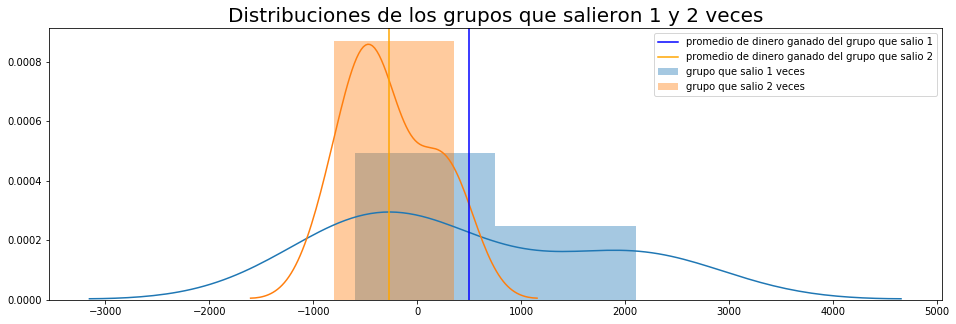

In [94]:
comprobar(l_1,l_2,s_1,s_2,1,2)

### Los que salieron 1 día y 3 días

,Grupo,Promedio,varianza,Tamaño muestra,STD
0,1.0,500.0,2010000.0,3.0,1417.744688
1,3.0,760.0,958000.0,5.0,978.774744


Ttest_indResult(statistic=-0.2801047688325716, pvalue=0.796651780183196)


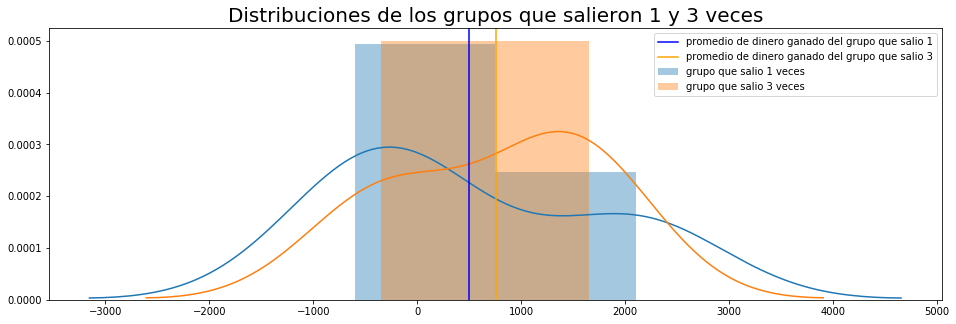

In [95]:
comprobar(l_1,l_3,s_1,s_3,1,3)

### Los que salieron 1 día y los que salieron 4 días

,Grupo,Promedio,varianza,Tamaño muestra,STD
0,1.0,500.0,2010000.0,3.0,1417.744688
1,4.0,-375.0,1201250.0,2.0,1096.015511


Ttest_indResult(statistic=0.7762459638285143, pvalue=0.49866670358090465)


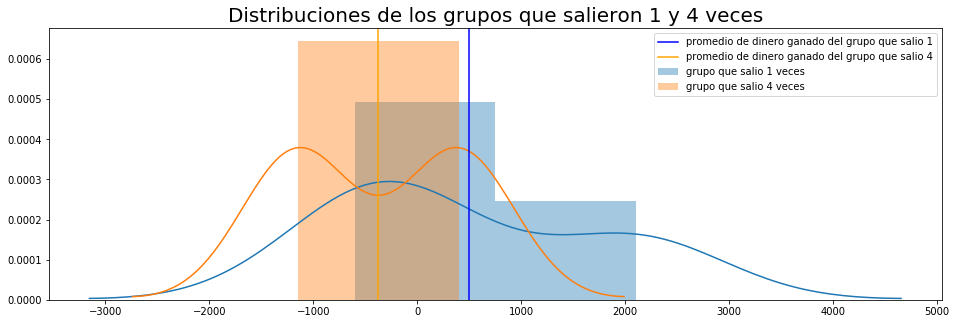

In [96]:
comprobar(l_1,l_4,s_1,s_4,1,4)

### Los que salieron 2 veces y 3 veces

,Grupo,Promedio,varianza,Tamaño muestra,STD
0,2.0,-266.666667,185666.666667,6.0,430.890551
1,3.0,760.000000,958000.000000,5.0,978.774744


Ttest_indResult(statistic=-2.17631163166921, pvalue=0.0785430719978853)


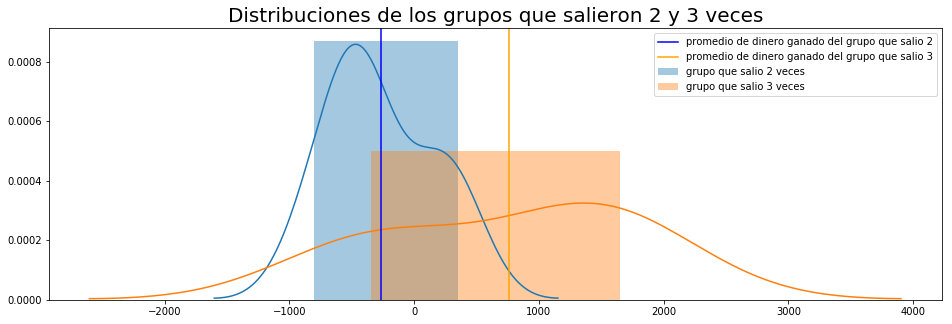

In [97]:
comprobar(l_2,l_3,s_2,s_3,2,3)

### Los que salieron 2 y 4 veces

,Grupo,Promedio,varianza,Tamaño muestra,STD
0,2.0,-266.666667,1.856667e+05,6.0,430.890551
1,4.0,-375.000000,1.201250e+06,2.0,1096.015511


Ttest_indResult(statistic=0.13631748062173696, pvalue=0.912099054869068)


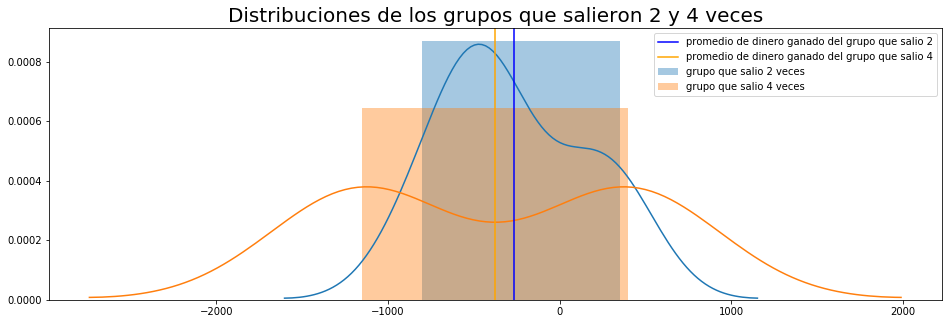

In [98]:
comprobar(l_2,l_4,s_2,s_4,2,4)

### Los que salieron 3 y 4 veces

,Grupo,Promedio,varianza,Tamaño muestra,STD
0,3.0,760.0,958000.0,5.0,978.774744
1,4.0,-375.0,1201250.0,2.0,1096.015511


Ttest_indResult(statistic=1.2751802857924162, pvalue=0.3492368438570569)


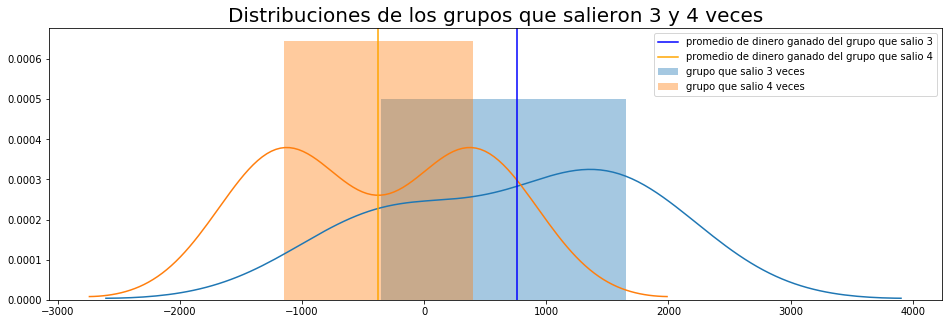

In [99]:
comprobar(l_3,l_4,s_3,s_4,3,4)

# Conclusión

Debido al altísimo P-value que arrojaron los resultados, en ningún caso podemos rechazar la hipótesis nula, es decir, no existe evidencia significativa para separar los datos por el número de veces que salieron por semana